In [1]:
import numpy as np
import pandas as pd
import csv
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import tree
%run Functions.ipynb
import matplotlib.pyplot as plt

In [6]:
DATA=pd.read_csv("IntervalInfo.csv")
DATA=DATA[DATA.columns[2:]]

#DATA = DATA.head(100) #takes first 100 rows to make sure the rest of the code works before making it bigger
print(len(DATA))
DATA.dropna(inplace=True)
print(len(DATA))
DATA.head()


71477
71477


,Abnormal,Result,R-R Interval,R Height,R_Onset-Rpeak,Q-Q Interval,Q Height,P_Onset-P_Offset,P Height,P-P Interval,P_Onset-Ppeak
0,0.0,N,0.0,1212.0,56.0,0.0,953.0,61.0,978.0,0.0,28.0
1,0.0,N,292.0,1201.0,50.0,294.0,947.0,60.0,976.0,295.0,28.0
2,0.0,N,284.0,1186.0,54.0,285.0,946.0,65.0,971.0,280.0,28.0
3,0.0,N,285.0,1188.0,59.0,284.0,948.0,66.0,973.0,283.0,29.0
4,0.0,N,284.0,1201.0,56.0,283.0,952.0,64.0,977.0,285.0,28.0


In [5]:
model = tree.DecisionTreeClassifier()

In [8]:
inputs = DATA.drop(["Result","Abnormal"],axis='columns')
Target = DATA[["Abnormal"]]
print(Target)

       Abnormal
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
71472       0.0
71473       0.0
71474       0.0
71475       0.0
71476       0.0

[71477 rows x 1 columns]


In [9]:
#Randomize the data (df = df.sample(frac = 1)
x_train, x_test, y_train, y_test = train_test_split(inputs, Target,test_size=0.3)
print(len(x_train))
print(len(y_train))


print(len(x_test))
print(len(y_test))


50033
50033
21444
21444


In [10]:
model.fit(X=x_train,y=y_train)

DecisionTreeClassifier()

In [11]:
model.score(x_test,y_test)

0.93084312628241

In [13]:
i=16
print(model.predict([x_test.iloc[i]]))
print(y_test.iloc[i])

[0.]
Abnormal    0.0
Name: 42558, dtype: float64


In [18]:
CLASSNAMES=["0","1"]

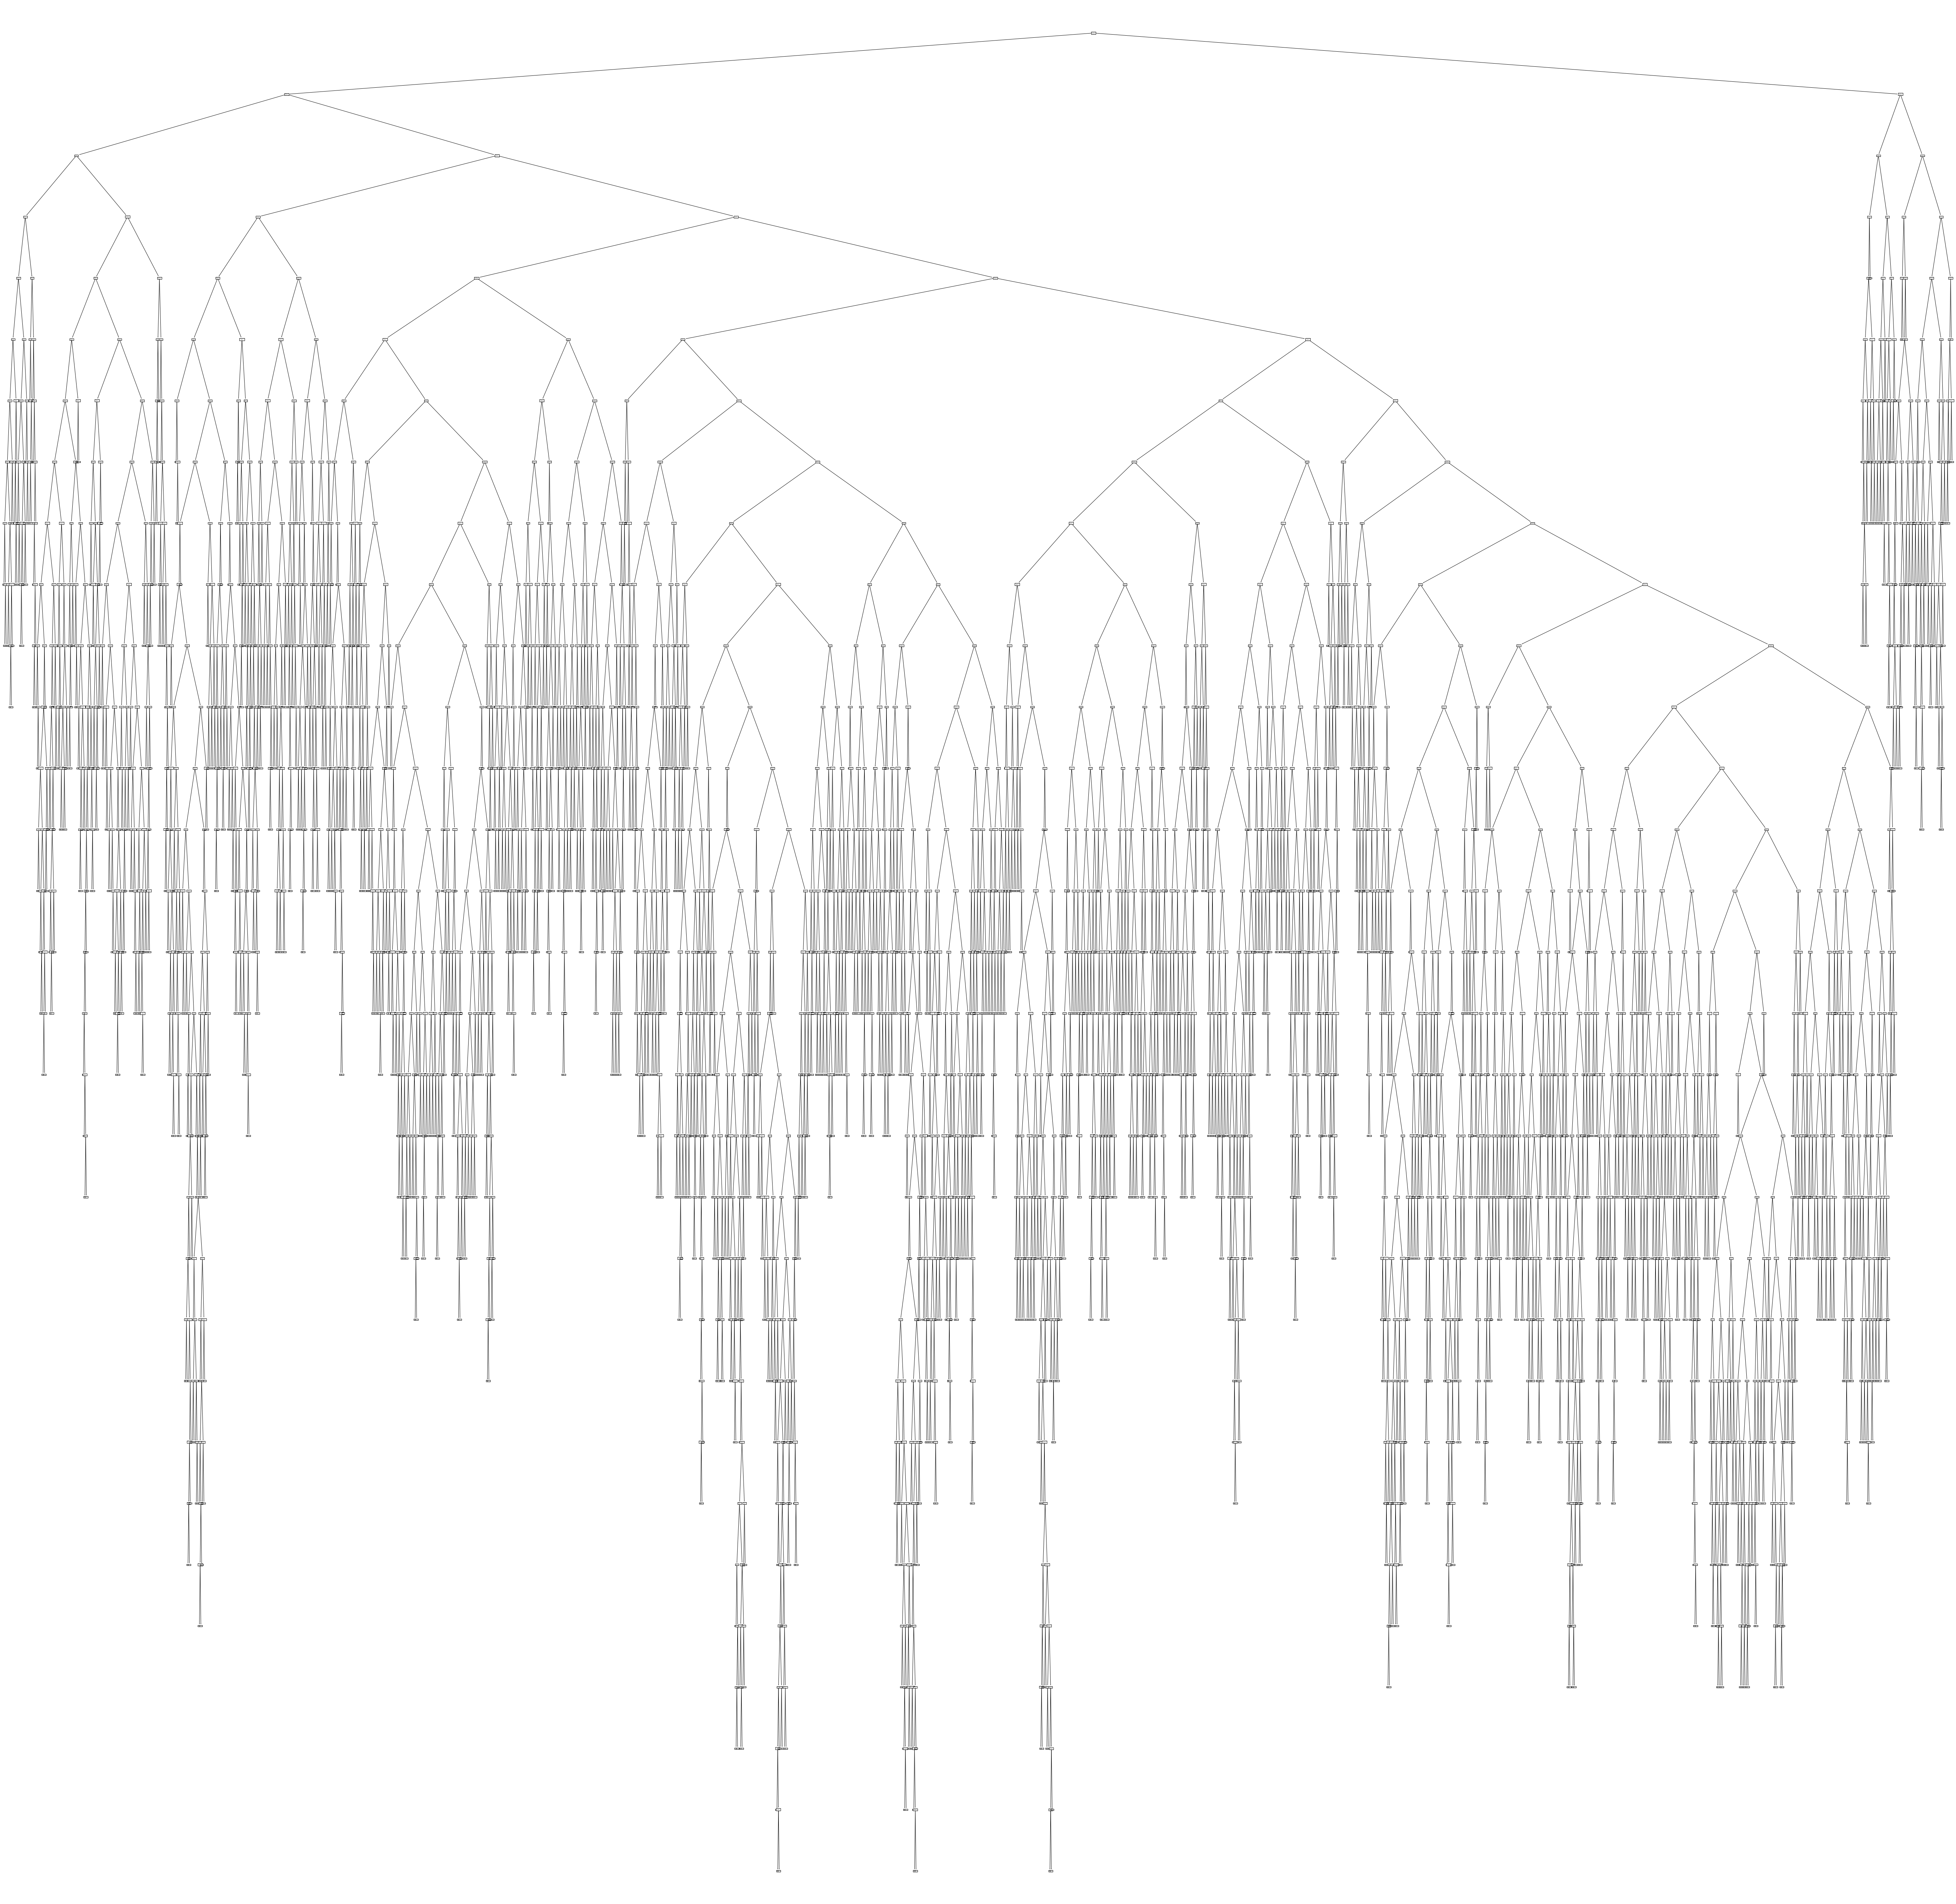

In [21]:
fig = plt.figure(figsize=(100,100))
#_ = tree.plot_tree(model,feature_names=inputs.columns,class_names=CLASSNAMES)
_ = tree.plot_tree(model,feature_names=inputs.columns)